In [16]:
import pandas as pd
import matplotlib.pyplot as plt


In [17]:
data = pd.read_csv('visits.csv', sep = '\t')
data.head()

,date_time,id,time_spent,name
0,20180406T165358,76144fb2,98.0,Василёк
1,20180404T173913,76144fb2,15.0,Василёк
2,20180403T172824,76144fb2,220.0,Василёк
3,20180407T070441,76144fb2,19.0,Василёк
4,20180404T132049,76144fb2,14.0,Василёк


In [18]:
#считаем среднее время заправки для каждой сети АЗС
stat = data.pivot_table(index='name', values='time_spent')
stat

,time_spent
name,
Агератум,337.802721
Амарант,132.760012
Аммобиум,256.708042
Арктотис,73.879984
Астильба,376.143149
Бальзамин,134.508411
Бархатцы,145.300328
Бегония,163.200647
Белоцветник,100.818966


У сетей АЗС «Нарцисс», «Арктотис» и «Малопа» среднее время заправки около 70 секунд. Неправдоподобно мало.
Необходимо оценить, насколько данные достоверны и сделать базовые проверки. Например, можно ответить на вопросы:  
- Сколько всего заездов зафиксировано за время исследования?
- Сколько АЗС?
- Сколько заездов на одну АЗС в день?
- Какие сети АЗС самые популярные?

In [19]:
total_visits =  len(data) 
print('Количество заездов:', total_visits)

total_stations = len(data.id.unique())
print('Количество АЗС:', total_stations)

print(data.date_time.min(), data.date_time.max())

total_days = 7
station_visits_per_day = total_visits / total_stations / total_days
print('Количество заездов на АЗС в сутки:', station_visits_per_day)

print(data.name.value_counts().head(10))

Количество заездов: 317104
Количество АЗС: 471
20180402T000008 20180408T235957
Количество заездов на АЗС в сутки: 96.17955717318775
name
Календула      85648
Василёк        79006
Георгина       34356
Немезия        20138
Колокольчик    18835
Мальва         17386
Гейхера        14125
Доротеантус     6312
Нарцисс         3640
Амарант         3221
Name: count, dtype: int64


Медианные и средние значения недостаточно характеризуют данные. Настало время посмотреть на распределение значений.

<Axes: >

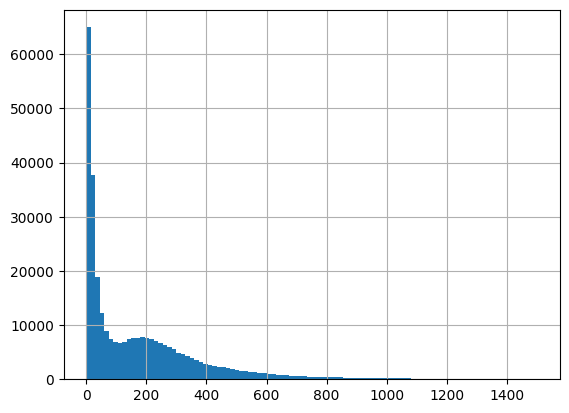

In [20]:
data.time_spent.hist(bins=100, range=(0, 1500))

Мощный узкий пик около 0 сек, широкий пик около 200 сек. Очень мало значений после 1000 сек, но отдельные выбросы были и до 30000 сек

<Axes: >

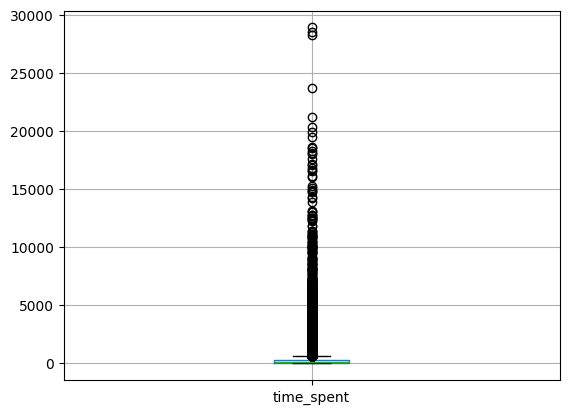

In [21]:
data.boxplot() 

(-100.0, 1000.0)

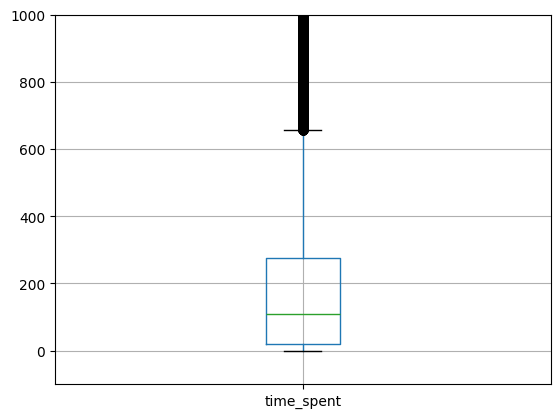

In [22]:
#меняем масштаб графика
data.boxplot() 
plt.ylim(-100, 1000)

Можно увидеть, что большая часть значений лежит в диапазоне до 300 сек, что выглядит правлоподобно. Но при этом 1-й квартиль лежит на уровне менее 50 сек, это подозрительно

In [23]:
data.describe()

,time_spent
count,317104.000000
mean,203.382294
std,395.754791
min,0.000000
25%,19.000000
50%,108.000000
75%,274.000000
max,28925.000000


Среднее почти в два раза больше медианы. Значит в распределении есть длинный хвост с высокими значениями или несколько очень больших значений. Это влияет на среднее, но не на медиану

In [24]:
data.sort_values('time_spent', ascending=False).head(10) 

,date_time,id,time_spent,name
114797,20180402T055708,3c1e4c52,28925.0,Василёк
27147,20180406T080254,4b5f2af5,28519.0,Немезия
60547,20180408T000002,cf1ba8a5,28292.0,Василёк
19042,20180408T204208,5410e876,23696.0,Василёк
118597,20180408T165020,3c1e4c52,21184.0,Василёк
118058,20180402T111333,3c1e4c52,20359.0,Василёк
114406,20180408T083722,3c1e4c52,19886.0,Василёк
132164,20180405T160745,627ea5e3,19445.0,Левкой
281360,20180406T180459,d0c0928d,18614.0,Пион
165326,20180402T230204,3af3bb71,18569.0,Агератум


Во-первых, в столбце id разные значения, значит долго заправляются не на одной единственной АЗС. Во-вторых, АЗС в списке вообще из разных сетей. 
Выделяется id == "3c1e4c52", он встречается несколько раз. Четыре из десяти самых долгих заездов произошли на станции под номером 3c1e4c52. Нужно проверить как распределение времени, проведённого на этой АЗС, соотносится с распределением времени заездов в целом? 

#число заездов на АЗС 3c1e4c52
sample = data.query('id == "3c1e4c52"')
len(sample)

Нужно сравнить распределение времени пребывания на станции 3c1e4c52 с распределением времени пребывания на всех АЗС. Если они сильно различаются, возможно, станция 3c1e4c52 представляет собой статистический выброс. 

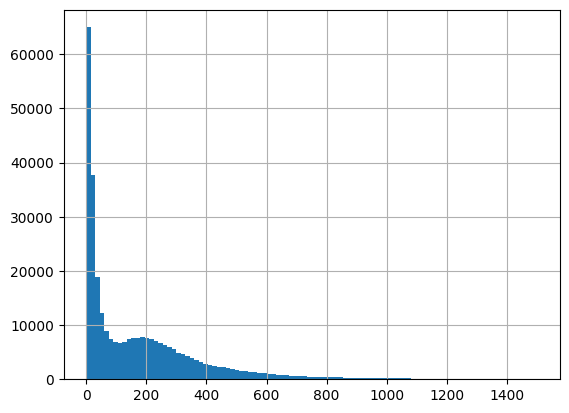

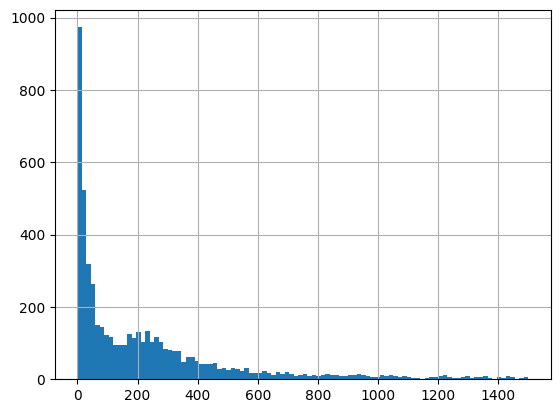

In [28]:
data['time_spent'].hist(bins=100, range=(0, 1500))
plt.show()
sample['time_spent'].hist(bins=100, range=(0, 1500))
plt.show()

Гистограмма среза sample и всего набора данных внешне похожи - имеют по два пика: около нулевого времени и около 200 секунд. Только вот гистограмма sample не такая гладкая, на ней заметны одиночные хаотичные всплески или шумы. Общее правило: чем данных меньше, тем шумнее гистограмма.

Нетипично долгие заезды признаем выбросами и отбросим. Почему так можно? 
Во-первых, их немного. Во-вторых, скорее всего, такие заезды — не заправки. Например, водитель мог отдыхать, есть или заниматься чем-то ещё. Раз это не заправки в чистом виде, значит, в рамках нашего исследования такие заезды не интересны. 
Как определить, что заправка «слишком долгая»? Где провести границу между заправкой автомобиля и прочими занятиями на АЗС? 
Посмотрим на Гистограмму с распредлением времени по всем АЗС.
Заправки продолжительностью 600 секунд — уже редки. Дольше 800 секунд почти не заправляются. А на участке более 1300 секунд гистограмма сливается с нулём (это не значит, что там ровно 0, но таких заправок единицы).
Примем верхнюю границу в 1000 секунд. Это число кажется разумным: дольше заправляются редко. Если отбросить значения больше 1000, много данных не потеряется. Да и вряд ли водители тратят на заправку больше 1000 секунд (16 минут).
Решено. Продолжаем работать с наблюдениями, удовлетворяющими условию: data.query('time_spent < 1000').

Причиной коротких заездов может быть то, что водители нечаянно заезжают на АЗС, которые не работают по ночам. Если это действительно так, то вы увидите связь между короткими заездами и временем прибытия. Чтобы проверить эту гипотезу, измените тип столбца date_time на более удобный тип для даты. 

In [29]:
data['date_time'] = pd.to_datetime(data['date_time'], format='%Y%m%dT%H%M%S')
data.head(5)

,date_time,id,time_spent,name
0,2018-04-06 16:53:58,76144fb2,98.0,Василёк
1,2018-04-04 17:39:13,76144fb2,15.0,Василёк
2,2018-04-03 17:28:24,76144fb2,220.0,Василёк
3,2018-04-07 07:04:41,76144fb2,19.0,Василёк
4,2018-04-04 13:20:49,76144fb2,14.0,Василёк


В датафрейме записано время UTC. Московское рассчитывают как UTC + 3 часа.
Делаем новый столбец со сдвинутым временем +3:

In [30]:
data['local_time'] = data['date_time'] + pd.Timedelta(hours=3)
data.head(5)

,date_time,id,time_spent,name,local_time
0,2018-04-06 16:53:58,76144fb2,98.0,Василёк,2018-04-06 19:53:58
1,2018-04-04 17:39:13,76144fb2,15.0,Василёк,2018-04-04 20:39:13
2,2018-04-03 17:28:24,76144fb2,220.0,Василёк,2018-04-03 20:28:24
3,2018-04-07 07:04:41,76144fb2,19.0,Василёк,2018-04-07 10:04:41
4,2018-04-04 13:20:49,76144fb2,14.0,Василёк,2018-04-04 16:20:49


Данные, связанные со временем, лучше округлять до той величины, которой будет достаточно для детального анализа. Чтобы проанализировать взаимосвязь между временем прибытия на АЗС и продолжительностью заезда, точность до минут и секунд не нужна. Округлим время до часов.


In [32]:
data['date_hour'] = data['local_time'].dt.round('1h')
data.head(5)

,date_time,id,time_spent,name,local_time,date_hour
0,2018-04-06 16:53:58,76144fb2,98.0,Василёк,2018-04-06 19:53:58,2018-04-06 20:00:00
1,2018-04-04 17:39:13,76144fb2,15.0,Василёк,2018-04-04 20:39:13,2018-04-04 21:00:00
2,2018-04-03 17:28:24,76144fb2,220.0,Василёк,2018-04-03 20:28:24,2018-04-03 20:00:00
3,2018-04-07 07:04:41,76144fb2,19.0,Василёк,2018-04-07 10:04:41,2018-04-07 10:00:00
4,2018-04-04 13:20:49,76144fb2,14.0,Василёк,2018-04-04 16:20:49,2018-04-04 16:00:00


Строим график зависимости продолжительности заправки от времени заправки:

<Axes: xlabel='local_time'>

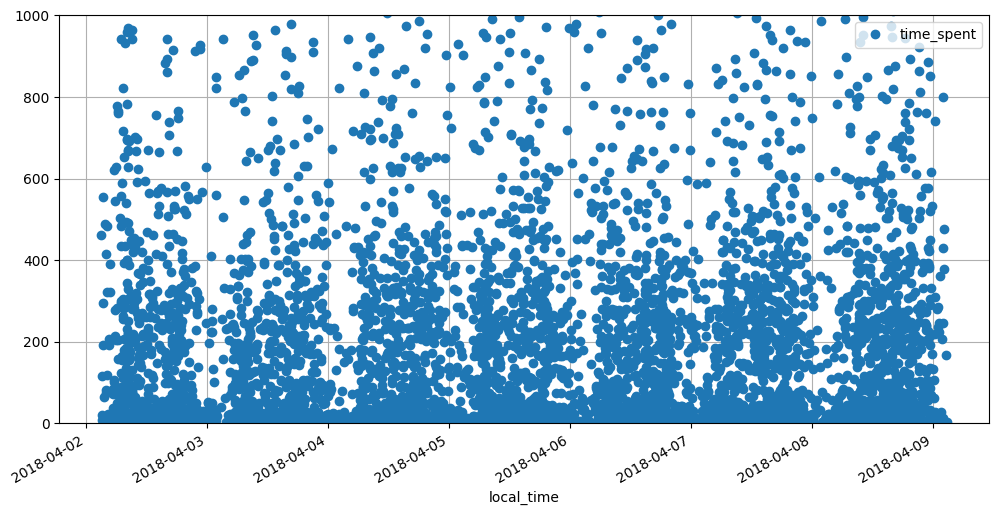

In [33]:
sample = data.query('id == "3c1e4c52"')
sample.plot(x='local_time', y='time_spent', style='o', ylim=(0,1000), grid=True, figsize=(12,6))

Закономерность прослеживается, только она никак не связана с короткими заездами. Оказывается такие заезды бывают в любое время. Поэтому теперь нужно понять, стоит ли вообще исключать эти данные.

На графике видна структура с провалами плотности в районе ночных часов. Это кажется правдоподобным: машин и, как следствие, заправок ночью меньше. 
Подозрительно коротких заездов (с продолжительностью менее 100 секунд) много в любое время суток. Хотя график строили по срезу, данных будто не стало меньше. Точки сливаются, делать по ним уверенные выводы трудно. Попробуем улучшить визуальное представление группировкой данных. 

На графике слишком много точек. Чтобы сделать его нагляднее, будем отмечать не визит, а среднюю продолжительность заправки в час.

<Axes: xlabel='date_hour'>

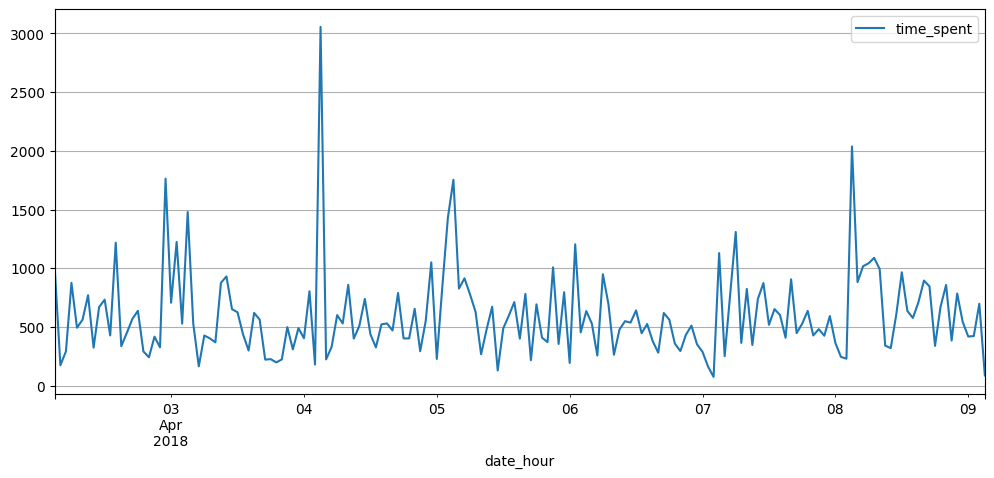

In [35]:
data.query('id == "3c1e4c52"') \
    .pivot_table(index='date_hour', values='time_spent') \
    .plot(grid=True, figsize=(12, 5))

На графике показана средняя продолжительность заправки на АЗС под номером 3c1e4c52 за каждый час. Обратите внимание, что в среднем водители проводят на АЗС около 500 секунд. Помня о пике гистограммы в 200 секунд, нельзя не удивиться такому значению.  

Есть и таинственный пик, когда среднее время заправки достигло 3000 секунд (почти час). Многовато. В прошлых уроках заезды дольше 1000 секунд вообще отбрасывались, ведь они не слишком похожи на правду. Добавим соответствующее условие в query():

<Axes: xlabel='date_hour'>

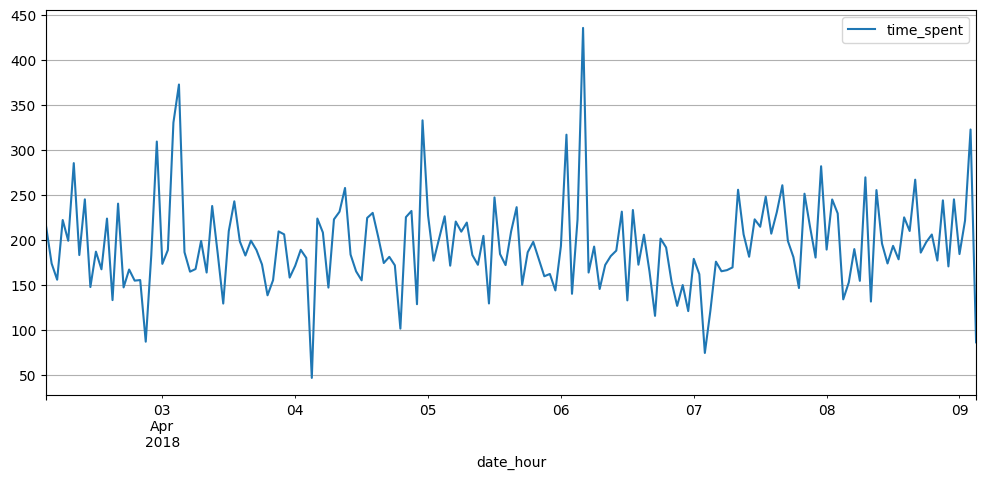

In [36]:
data.query('id == "3c1e4c52" and time_spent < 1000') \
    .pivot_table(index='date_hour', values='time_spent') \
    .plot(grid=True, figsize=(12, 5))

Средняя продолжительность заправки снизилась вполовину! 

Вычислим устойчивую к выбросам медиану

<Axes: xlabel='date_hour'>

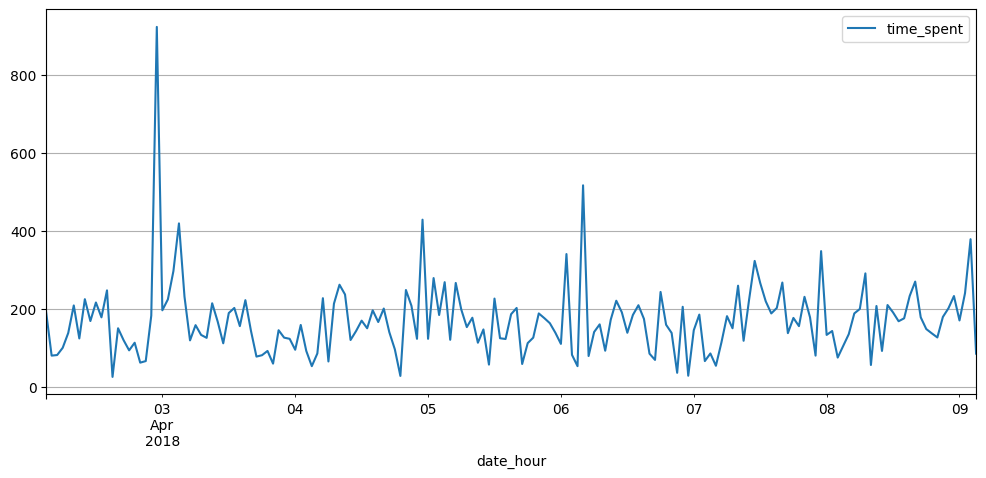

In [37]:
data.query('id == "3c1e4c52"') \
    .pivot_table(index='date_hour', values='time_spent', aggfunc='median') \
    .plot(grid=True, figsize=(12, 5))

Даже без фильтра time_spent < 1000 медиана дала среднюю продолжительность заправки примерно в 200 секунд. Медиана устойчива к выбросам, но всё же не безупречна: пик более 800 секунд в ночь со 2 на 3 апреля выглядит аномальным значением.
Нет явной связи между продолжительностью заезда и временем дня. Это странно. На этой АЗС не бывает очередей? Или что-то не так с данными? Число заездов в течение дня точно должно меняться. 

Если между временем прибытия на АЗС и числом заездов нет никакой связи, это серьёзный повод насторожиться. Вряд ли количество заездов в два часа ночи и в восемь утра одинаково. Чтобы понять, что же происходит, построим график зависимости между временем прибытия и количеством заездов в час.

<Axes: xlabel='date_hour'>

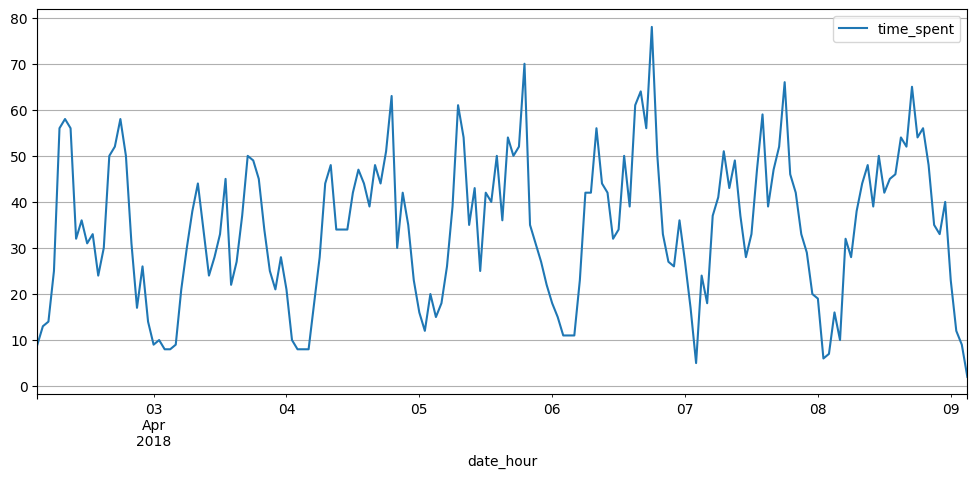

In [39]:
data.query('id=="3c1e4c52"') \
    .pivot_table(index='date_hour', values='time_spent', aggfunc='count') \
    .plot(grid=True, figsize=(12, 5))

Обнаружена ожидаемая закономерность! Ночью заездов на АЗС в несколько раз меньше, чем днем. Факт заезда в данных отображен правдоподобно, а вот с продолжительностью пока непонятно.

Продолжительность заправки около 0 секунд всё ещё выглядит необъяснимо странной. Неужели такие заезды придётся отбросить? Это уже было сделано с подозрительно долгими заправками, признанными выбросами. Однако сверхкоротких заездов гораздо больше, чем очень долгих. Если от них избавиться, то данные наверняка сильно исказятся. 
Как много строк потеряется, если просто отбросить подозрительно короткие события? Посчитаем долю заездов на АЗС продолжительностью менее 60 секунд:

In [40]:
# делим количество заездов короче 60 секунд на общее число заездов
len(data.query('time_spent < 60')) / len(data)

0.42213910893586964

Таких аномально быстрых заездов 42%. Очень много. 
Насколько равномерно они распределены по разным АЗС? Везде около 40%? Или где-то их нет, а на каких-то АЗС много? 

In [41]:
#выделяем аномально быстрые заезды
data['too_fast'] = data['time_spent']<60
data.head(5)

,date_time,id,time_spent,name,local_time,date_hour,too_fast
0,2018-04-06 16:53:58,76144fb2,98.0,Василёк,2018-04-06 19:53:58,2018-04-06 20:00:00,False
1,2018-04-04 17:39:13,76144fb2,15.0,Василёк,2018-04-04 20:39:13,2018-04-04 21:00:00,True
2,2018-04-03 17:28:24,76144fb2,220.0,Василёк,2018-04-03 20:28:24,2018-04-03 20:00:00,False
3,2018-04-07 07:04:41,76144fb2,19.0,Василёк,2018-04-07 10:04:41,2018-04-07 10:00:00,True
4,2018-04-04 13:20:49,76144fb2,14.0,Василёк,2018-04-04 16:20:49,2018-04-04 16:00:00,True


In [42]:
#другой способ подсчета среднего
data.too_fast.mean()

np.float64(0.42213910893586964)

In [44]:
#группируем данные по АЗС
too_fast_stat = data.pivot_table(index='id', values='too_fast')
too_fast_stat.head(5)

,too_fast
id,
00ca1b70,0.250000
011f7462,0.637489
015eaddd,0.726190
0178ce70,0.211538
018a83ef,0.510269


Уже по первым пяти строкам видно, что доля сверхкоротких заправок очень неоднородна: на одних АЗС они составляют по 20% от всех заездов, а на других - целых 70%.

array([[<Axes: title={'center': 'too_fast'}>]], dtype=object)

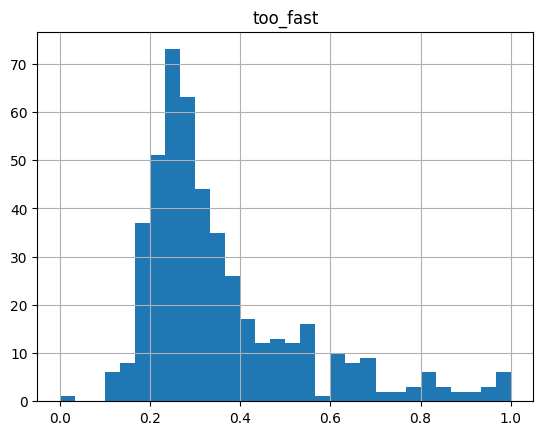

In [45]:
#строим гистограммму, чтобы посмотреть распределение всех значений
too_fast_stat.hist(bins=30)

Пик графика около 0.3. Значит у болишинства АЗС около 30% заездов аномально быстрые. Однако бывают и АЗС, где 100% аномально быстрые!

array([[<Axes: title={'center': 'too_slow'}>]], dtype=object)

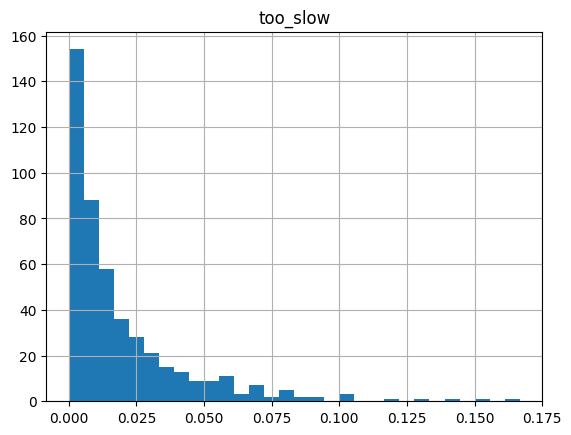

In [47]:
#применим такой же метод для проверки распределения для аномально долгих заправок
#с исключением time_spent > 1000
data['too_slow'] = data['time_spent'] > 1000
data.pivot_table(index='id', values='too_slow').hist(bins=30)

Слишком долгих заправок гораздо меньше, чем слишком коротких. На большинстве станций длительных заездов менее 5%. Простимся с ними без печали.

Предварительные итоги:
Бывает, что заправляются долго. Только доля таких заправок невелика. В гистограммах заездов на АЗС с рекордно долгими заправками — ничего особенного, выглядят они ожидаемо.
Было решено отбросить слишком долгие заезды (более 1000 секунд), а для надёжности - вместо среднего арифметического времени рассчитывать медианное. Тогда эти заезды не исказят оценку типичной продолжительности заправки.
А вот с короткими заездами всё не так радужно. Их гораздо больше. Есть АЗС, где коротких заправок большинство, а то и все 100%. 



In [48]:
#найдем проблемную АЗС для баг-репорта
too_fast_stat.sort_values('too_fast', ascending=False).head()

,too_fast
id,
c96c61cd,1.000000
c527c306,1.000000
5372547e,1.000000
792b6ded,0.996253
bd1d0bb0,0.982044


АЗС, где 100% заездов аномально быстрые, оказалось целых три! 

In [49]:
#методом describe() можно оценить данные первой АЗС —  id == "c96c61cd":
data.query('id == "c96c61cd"').describe()

,date_time,time_spent,local_time,date_hour
count,1,1.0,1,1
mean,2018-04-02 13:42:21,5.0,2018-04-02 16:42:21,2018-04-02 17:00:00
min,2018-04-02 13:42:21,5.0,2018-04-02 16:42:21,2018-04-02 17:00:00
25%,2018-04-02 13:42:21,5.0,2018-04-02 16:42:21,2018-04-02 17:00:00
50%,2018-04-02 13:42:21,5.0,2018-04-02 16:42:21,2018-04-02 17:00:00
75%,2018-04-02 13:42:21,5.0,2018-04-02 16:42:21,2018-04-02 17:00:00
max,2018-04-02 13:42:21,5.0,2018-04-02 16:42:21,2018-04-02 17:00:00
std,NaN,NaN,NaN,NaN


Всего один заезд. Это неудачный баг-репорт, ведь АЗС с одним заездом странная сама по себе. Если на ней и была какая-то проблема, не факт, что она массовая. 
Для баг-репорта нужна «полноценная» АЗС с достаточным числом аномально быстрых заездов. После аналогичной проверки следующих id в списке мы обнаружили, что нормальная статистика есть только по АЗС 792b6ded:

In [50]:
data.query('id == "792b6ded"').describe()

,date_time,time_spent,local_time,date_hour
count,4270,4270.000000,4270,4270
mean,2018-04-05 10:57:51.492037376,5.448712,2018-04-05 13:57:51.492037376,2018-04-05 13:58:17.142856960
min,2018-04-02 00:21:51,0.000000,2018-04-02 03:21:51,2018-04-02 03:00:00
25%,2018-04-03 16:39:26.500000,2.000000,2018-04-03 19:39:26.500000,2018-04-03 20:00:00
50%,2018-04-05 13:40:15,3.000000,2018-04-05 16:40:15,2018-04-05 17:00:00
75%,2018-04-06 20:58:21.500000,5.000000,2018-04-06 23:58:21.500000,2018-04-07 00:00:00
max,2018-04-08 23:55:25,228.000000,2018-04-09 02:55:25,2018-04-09 03:00:00
std,NaN,8.597126,NaN,NaN


Больше 4000 заездов, но почти все очень-очень короткие. 75% укладывается в 5 секунд. Первый квартиль составляет 2 секунды. Это значит, что как минимум 25% укладывается в 2 секунды.

Проблема: в выборке есть АЗС, на которых длительность большинства заездов короче 60 секунд.
Что нужно сделать: исключить эти АЗС из анализа. Так будет меньше шансов получить необъективные результаты, поскольку коротких заездов в целом больше всего.
Правило: исключаются из анализа те АЗС, на которых длительность половины или более заездов короче 60 секунд. 

In [54]:
good_ids = too_fast_stat.query('too_fast < 0.5') 
good_data = data.query('id in @good_ids.index')
print(len(data))
print(len(good_data))

317104
229095


После применения правила осталось 72% от первоначальных данных. Хотя 28% потерялось, качество данных улучшилось.

Проблема: в выборке есть аномально быстрые и аномально медленные заезды. Скорее всего, их совершали не те, кто приезжал просто заправиться.
Что нужно сделать: исключить эти заезды из анализа, чтобы получить более точные показатели. Аномальные значения могут влиять на средние значения и медианы. 
Правило: заезды, длительность которых короче 60 секунд и длиннее 1000 секунд, исключаются из анализа

In [55]:
good_data = good_data.query('60<=time_spent<=1000')
len(good_data)

154601

В предыдущих задачах вы выбросили из набора данных отдельные заезды и даже целые АЗС ради более реалистичной оценки. Проверьте, помогло ли это. Постройте гистограмму распределения медианной длительности заправки по всем АЗС.

array([[<Axes: title={'center': 'time_spent'}>]], dtype=object)

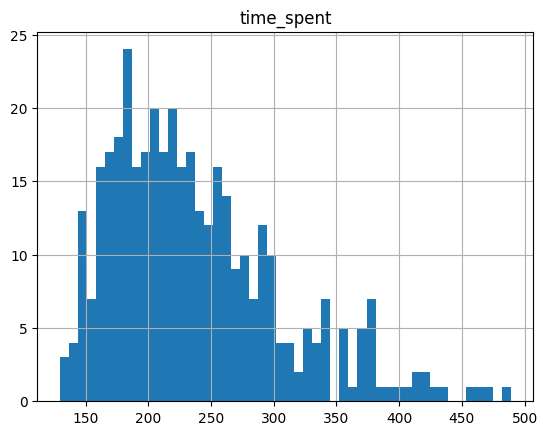

In [56]:
good_stations_stat = good_data.pivot_table(index='id', values='time_spent', aggfunc='median')
good_stations_stat.hist(bins=50)

Для большинства АЗС медианная длительность заезда находится в диапазоне между 150 сек (две с половиной минуты) и 300 сек (пять минут). Выглядит правдоподобно.

In [57]:
good_stat = good_data.pivot_table(index='name', values='time_spent', aggfunc='median')
good_stat.sort_values('time_spent')

,time_spent
name,
Белоцветник,154.0
Бальзамин,158.0
Незабудка,161.0
Колокольчик,161.0
Обриета,167.0
Функия,171.5
Гацания,178.5
Аммобиум,180.5
Пион,180.5


<Axes: ylabel='Frequency'>

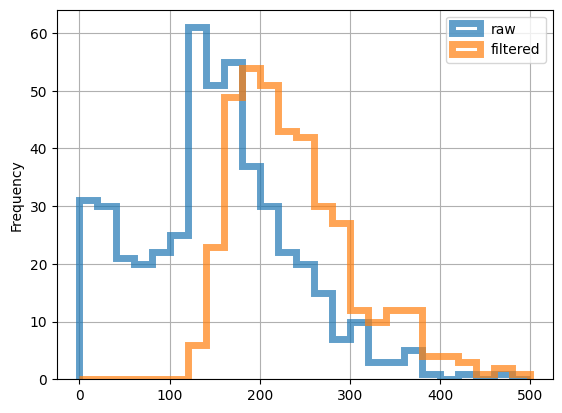

In [58]:
median_station_stat = data.pivot_table(index='id', values='time_spent', aggfunc='median')
ax = median_station_stat.plot(
    kind='hist',
    y='time_spent',
    histtype='step',
    range=(0, 500),
    bins=25,
    linewidth=5,
    alpha=0.7,
    label='raw',
)
good_stations_stat.plot(
    kind='hist',
    y='time_spent',
    histtype='step',
    range=(0, 500),
    bins=25,
    linewidth=5,
    alpha=0.7,
    label='filtered',
    ax=ax,
    grid=True,
    legend=True,
) 
                                       

Видно огромное различие на малых временах. В «сырых» данных есть большая группа АЗС с продолжительностью заправки менее 50 секунд. В отфильтрованных ничего подобного — вы сами отбросили АЗС с заездами короче 60 секунд. На самой «быстрой» АЗС в отфильтрованных данных заправляются дольше 100 секунд, а типичная продолжительность заправки около 200. Такое распределение больше похоже на правду, чем исходная гистограмма. 

In [59]:
#посмотрим, как «типичные» средняя и медианная длительности заправки различаются в зависимости от данных: сырых или отфильтрованных
#добавляем столбец в таблицу, в которой для каждой сети АЗС будут показаны средняя длительность заправки из сырых данных из таблицы stat и медианная длительность заправки из отфильтрованных данных из таблицы good_stat
stat['good_time_spent'] = good_stat['time_spent']
stat

,time_spent,good_time_spent
name,,
Агератум,337.802721,309.0
Амарант,132.760012,187.5
Аммобиум,256.708042,180.5
Арктотис,73.879984,185.0
Астильба,376.143149,423.0
Бальзамин,134.508411,158.0
Бархатцы,145.300328,181.5
Бегония,163.200647,195.0
Белоцветник,100.818966,154.0


Пора посмотреть, как заезды распределяются внутри сетей. Для этого про каждую АЗС нужно знать следующее: к какой сети она относится и сколько раз в общей сложности на неё заезжали.

In [61]:
id_name = good_data.pivot_table(index='id', values='name', aggfunc = ['first', 'count'])
id_name.columns = ['name', 'count']
id_name.head(5)

,name,count
id,,
00ca1b70,Вероника,131
0178ce70,Василёк,164
01abf4e9,Гацания,30
030a9067,Колокольчик,228
03740f2d,Василёк,157


В предыдущих уроках вы рассчитывали медианы по АЗС. Теперь нужно рассчитать медиану этих медиан по каждой сети. Это даст ещё один показатель «типичной» медианной длительности заездов в каждой сети: медиану распределения медианной длительности заездов на АЗС.
Из этого распределения медиан нужно будет исключить медианные значения, рассчитанные для АЗС с совсем небольшим числом заездов. Создайте таблицу со статистикой по АЗС, с помощью которой выявите и отфильтруйте эти лишние станции.

In [62]:
station_stat_full = id_name.join(good_stations_stat, on='id')
station_stat_full.head(5)

,name,count,time_spent
id,,,
00ca1b70,Вероника,131,166.0
0178ce70,Василёк,164,234.5
01abf4e9,Гацания,30,181.5
030a9067,Колокольчик,228,135.5
03740f2d,Василёк,157,289.0


<Axes: >

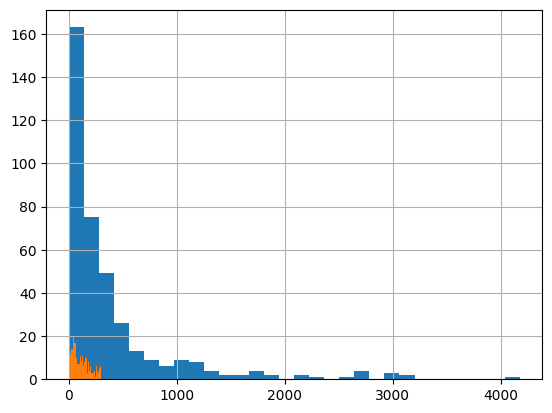

In [63]:
#распределение числа заездов по АЗС
station_stat_full['count'].hist(bins=30)
station_stat_full['count'].hist(bins=30, range=(0,300))

На первой гистограмме пик около 0 заездов. На второй - около 50. 
Можно отбросить все непопулярные станции, куда заежали менее 75 раз.

In [64]:
good_stat2 = station_stat_full.query('count>30').pivot_table(index='name', values='time_spent', aggfunc=['median', 'count'])
good_stat2.columns = ['median_time', 'stations']
good_stat2.head(5)

,median_time,stations
name,,
Агератум,308.50,3
Амарант,169.00,5
Аммобиум,178.75,4
Арктотис,190.50,3
Астильба,435.50,4


In [66]:
#объединение результатов
final_stat = stat.join(good_stat2)
final_stat

,time_spent,good_time_spent,median_time,stations
name,,,,
Агератум,337.802721,309.0,308.50,3.0
Амарант,132.760012,187.5,169.00,5.0
Аммобиум,256.708042,180.5,178.75,4.0
Арктотис,73.879984,185.0,190.50,3.0
Астильба,376.143149,423.0,435.50,4.0
Бальзамин,134.508411,158.0,158.00,1.0
Бархатцы,145.300328,181.5,181.50,1.0
Бегония,163.200647,195.0,190.00,3.0
Белоцветник,100.818966,154.0,154.00,1.0


Среднее время заправки в сети "Роза" теперь оценивается как 350 сек, а не 315. Еще пропали данные по сети "Обриета" - значит там были АЗС со слшком малым числом заездов. 

<Axes: xlabel='count', ylabel='time_spent'>

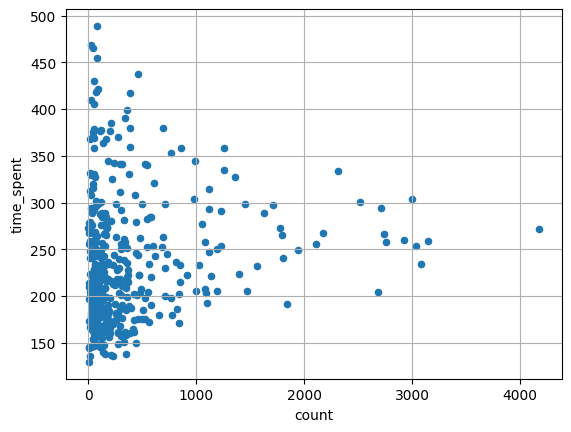

In [67]:
#строим диаграмму рассеивания
station_stat_full.plot(kind='scatter', x='count', y='time_spent', grid=True)

АЗС с малым количеством заездовимеют значительный разброс медианного времени заправки (от 120 до 500). Остальные обычно укладываются в границы 200-350. Это наводит на две идеи:
- АЗС С больщим числом заездов - крупные, процессы на них отлажены, вот и время одинаковое
- где мало заездов, там искажения данных более вероятны

In [70]:
#считаем коэффициент корреляции Пирсона между числом заездов на АЗС и временем заправки
station_stat_full['count'].corr(station_stat_full['time_spent'])

np.float64(0.12242632473597159)

Коэффициент ближе к 0, значит скорее всего особой связи между числом заездов на АЗС и продолжительснотью заправки нет. Либо она есть, но все сложнее, чем кажется.

            time_spent  too_fast  too_slow
time_spent    1.000000 -0.640658  0.802247
too_fast     -0.640658  1.000000 -0.255876
too_slow      0.802247 -0.255876  1.000000


array([[<Axes: xlabel='time_spent', ylabel='time_spent'>,
        <Axes: xlabel='too_fast', ylabel='time_spent'>,
        <Axes: xlabel='too_slow', ylabel='time_spent'>],
       [<Axes: xlabel='time_spent', ylabel='too_fast'>,
        <Axes: xlabel='too_fast', ylabel='too_fast'>,
        <Axes: xlabel='too_slow', ylabel='too_fast'>],
       [<Axes: xlabel='time_spent', ylabel='too_slow'>,
        <Axes: xlabel='too_fast', ylabel='too_slow'>,
        <Axes: xlabel='too_slow', ylabel='too_slow'>]], dtype=object)

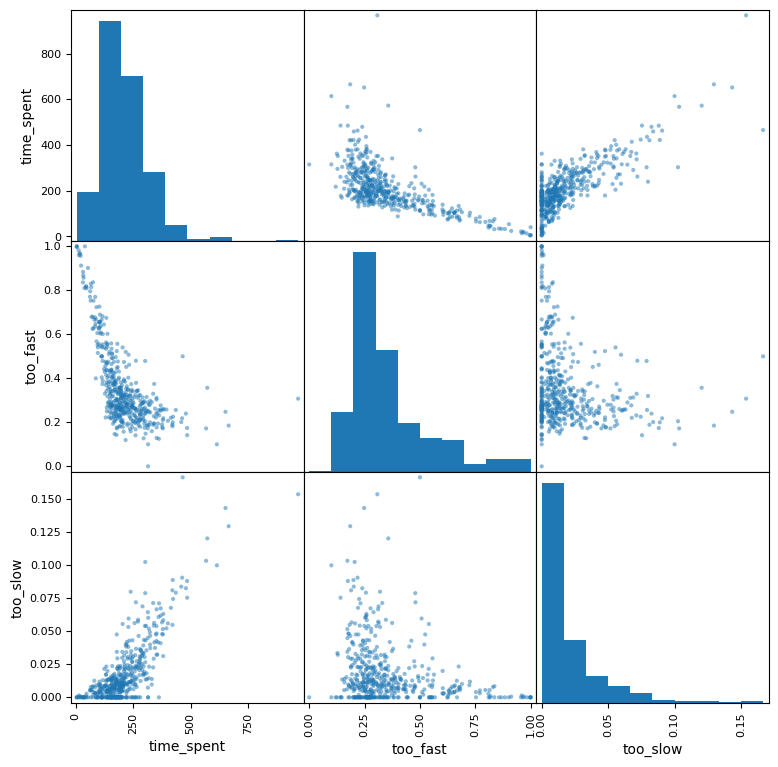

In [72]:
station_stat_multi = data.pivot_table(index='id', values=['time_spent', 'too_fast', 'too_slow'])
print(station_stat_multi.corr()) #матрица корреляции
pd.plotting.scatter_matrix(station_stat_multi, figsize=(9,9))

Самый большой коэффициент корреляции — 0,8 — между аномально долгими заправками (too_slow) и средней продолжительностью заправки (time_spent). Это заметно и на соответствующей диаграмме рассеяния. Зная одно значение, можно предсказать другое. Если бы слишком долгие заезды не были отрезаны, они бы сказались на среднем времени. Поэтому так важно было их отбросить и вместо среднего значения взять медиану.
Зависимость между аномально быстрыми заправками (too_fast) и средней продолжительностью заправки интереснее. На диаграмме рассеяния видно, что при too_fast > 0.6 (т. е. более 60% заездов на АЗС продолжались меньше минуты) среднее время заправки почти полностью определяется как раз долей этих быстрых заездов. Если бы мы их не отфильтровали, типичное время заправки напоминало бы пит-стоп на «Формуле-1». 
Графики подтверждают, что двигаетесь вы верным путём.

array([[<Axes: xlabel='time_spent', ylabel='time_spent'>,
        <Axes: xlabel='too_fast', ylabel='time_spent'>,
        <Axes: xlabel='too_slow', ylabel='time_spent'>,
        <Axes: xlabel='good_time_spent', ylabel='time_spent'>],
       [<Axes: xlabel='time_spent', ylabel='too_fast'>,
        <Axes: xlabel='too_fast', ylabel='too_fast'>,
        <Axes: xlabel='too_slow', ylabel='too_fast'>,
        <Axes: xlabel='good_time_spent', ylabel='too_fast'>],
       [<Axes: xlabel='time_spent', ylabel='too_slow'>,
        <Axes: xlabel='too_fast', ylabel='too_slow'>,
        <Axes: xlabel='too_slow', ylabel='too_slow'>,
        <Axes: xlabel='good_time_spent', ylabel='too_slow'>],
       [<Axes: xlabel='time_spent', ylabel='good_time_spent'>,
        <Axes: xlabel='too_fast', ylabel='good_time_spent'>,
        <Axes: xlabel='too_slow', ylabel='good_time_spent'>,
        <Axes: xlabel='good_time_spent', ylabel='good_time_spent'>]],
      dtype=object)

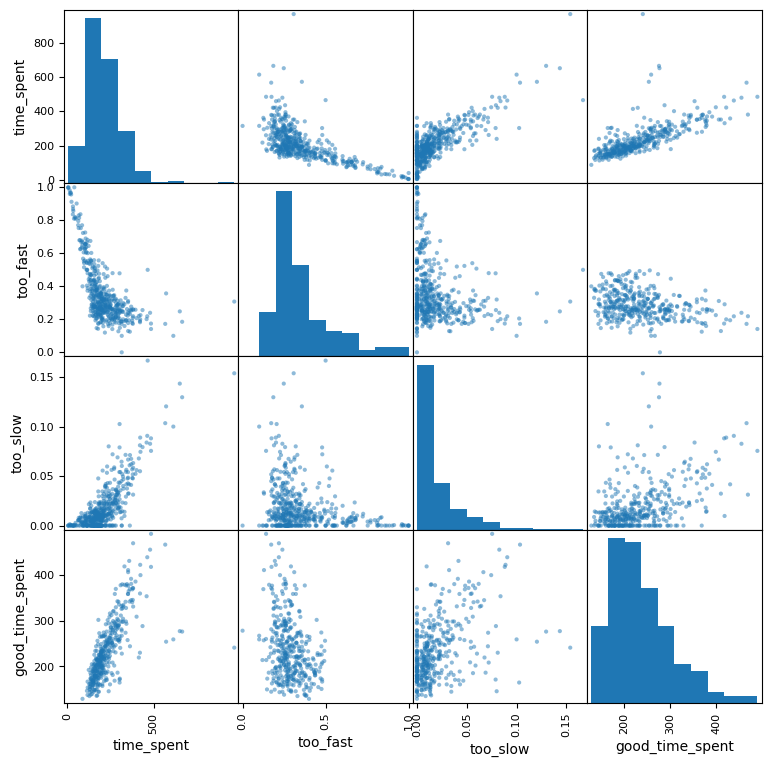

In [74]:
#добавим в таблицу station_stat_multi столбец good_time_spent из данных good_stations_stat 
station_stat_multi['good_time_spent'] = good_stations_stat['time_spent']

pd.plotting.scatter_matrix(station_stat_multi, figsize=(9,9))

В ячейке too_fast — time_spent видна почти прямая зависимость между too_fast и time_spent в зоне too_fast > 0.6. То есть время на АЗС там практически однозначно определяет доля быстрых заездов. 
Зависимость медианной длительности заезда good_time_spent от аномально быстрых заездов в соответствующем поле too_fast уже значительно меньше. Данные в этой ячейке видятся наиболее очищенными от влияния слишком быстрых заездов. Зона 0.35 < too_fast < 0.5 уже спорная. И всё же данные из неё гораздо меньше загрязнены, чем данные с too_fast > 0.5. Это видно по тому, что в такой зоне нет прямой зависимости между too_fast и good_time_spent.

Перед тем как делать выводы, надо перепроверить реалистичность данных.
Отчёт выглядит так. Достоверная типичная продолжительность заправки указана в median_time:

In [75]:
final_stat

,time_spent,good_time_spent,median_time,stations
name,,,,
Агератум,337.802721,309.0,308.50,3.0
Амарант,132.760012,187.5,169.00,5.0
Аммобиум,256.708042,180.5,178.75,4.0
Арктотис,73.879984,185.0,190.50,3.0
Астильба,376.143149,423.0,435.50,4.0
Бальзамин,134.508411,158.0,158.00,1.0
Бархатцы,145.300328,181.5,181.50,1.0
Бегония,163.200647,195.0,190.00,3.0
Белоцветник,100.818966,154.0,154.00,1.0


<Axes: xlabel='name'>

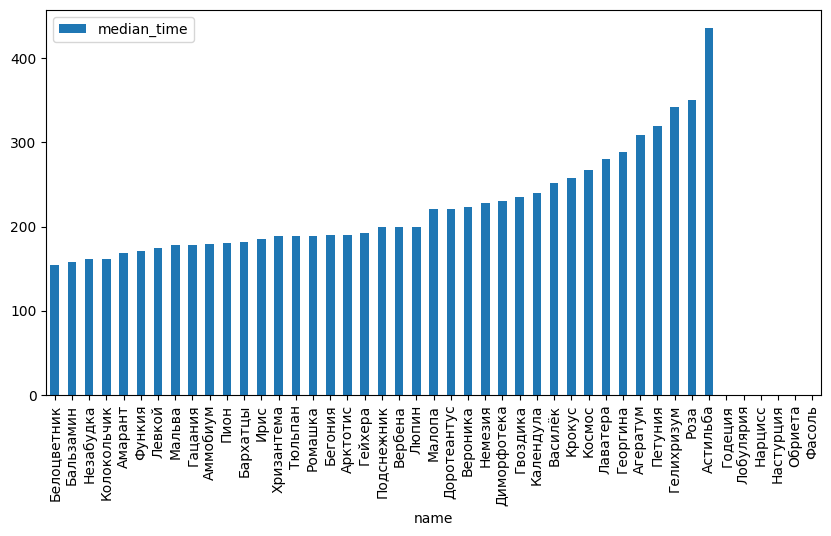

In [77]:
#визуализируем распределение лучших показателей заездов с типичной продолжительностью по сетям АЗС
final_stat \
    .sort_values('median_time') \
    .plot(kind='bar', y='median_time', figsize=(10,5))

Хорошо видно, как различаются сети. Есть группа сетей, где заправляют быстрее 200 секунд. И группа более медлительных конкурентов: с диапазоном 200–350 секунд. Утешительный приз в конкурсе «скорость без границ» получает сеть «Астильба», где ухитряются заправлять дольше 400 секунд. Наверное, там есть подкачка шин, телевизор и вкусный кофе.

График отображает шесть сетей АЗС без данных: «Годецию», «Лобулярию», «Нарцисс», «Обриету» и «Фасоль». Это значения NaN в final_stat, которые появились, потому что исключены непопулярные АЗС.

<Axes: xlabel='name'>

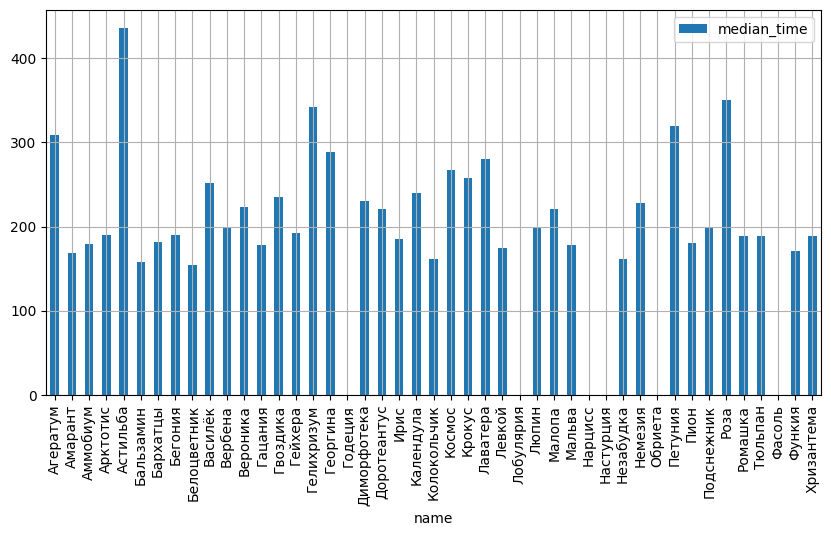

In [78]:
#удаляем значения NaN
final_stat.dropna(subset=['median_time']).sort_values('median_time')
final_stat.plot(kind='bar', y='median_time', figsize=(10,5), grid=True)

Теперь ничего лишнего. Хорошо видна условная граница, разделяющая «быстрые» и «медленные» сети. 
Что даёт этот факт? Клиентам «быстрых» АЗС оплата заправки через Яндекс.Навигатор вряд ли принесёт много пользы. Они и без этого и заправляются, и платят быстро. А вот клиентам АЗС, чьи процессы отлажены не так хорошо, Яндекс.Навигатор поможет проводить меньше времени на станции. А сами АЗС могли бы значительно улучшить показатели. 
От аналитика ждут, что он укажет, кого избрать ключевым партнёром. А какая «медленная» сеть всех крупнее, всех масштабнее и виднее?

array([[<Axes: title={'center': 'stations'}>]], dtype=object)

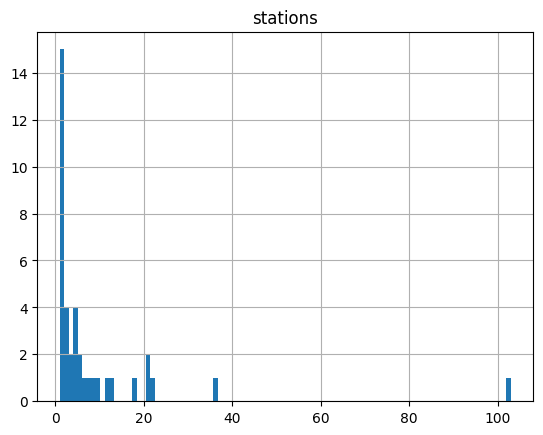

In [80]:
#смотрим число АЗС внутри сетей
final_stat.hist('stations', bins=100)

С точки зрения маркетинга интересны и сети с большей продолжительностью заправки, и сети, в которых много АЗС. Значит, нужно исключить те сети, в которых заправочных станций мало. 

In [81]:
#так как с точки зрения маркетинга небольшие сети неважны, создаем новую переменную с данными только крупных сетей
big_nets_stat = final_stat.query('stations>10')
big_nets_stat

,time_spent,good_time_spent,median_time,stations
name,,,,
Василёк,268.849897,264.0,252.00,103.0
Гейхера,167.445947,204.0,192.00,12.0
Календула,207.357323,254.0,240.00,36.0
Колокольчик,119.131564,161.0,161.00,21.0
Люпин,235.440937,186.0,200.00,13.0
Мальва,136.562234,182.0,177.75,22.0
Немезия,186.535207,226.0,227.50,21.0
Роза,260.877217,315.0,350.00,18.0


In [82]:
#делим на две группы
station_stat_full['group_name'] = station_stat_full['name'].where(station_stat_full['name'].isin(big_nets_stat.index), 'Другие')
station_stat_full.head(5)

,name,count,time_spent,group_name
id,,,,
00ca1b70,Вероника,131,166.0,Другие
0178ce70,Василёк,164,234.5,Василёк
01abf4e9,Гацания,30,181.5,Другие
030a9067,Колокольчик,228,135.5,Колокольчик
03740f2d,Василёк,157,289.0,Василёк


In [83]:
stat_grouped = (
    station_stat_full \
    .query('count>30') \
    .pivot_table(index='group_name', values='time_spent', aggfunc=['median', 'count'])
)
stat_grouped.columns = ['time_spent', 'count']
stat_grouped = stat_grouped.sort_values('time_spent')
stat_grouped

,time_spent,count
group_name,,
Колокольчик,161.00,21
Мальва,177.75,22
Гейхера,192.00,12
Люпин,200.00,13
Другие,208.75,104
Немезия,227.50,21
Календула,240.00,36
Василёк,252.00,103
Роза,350.00,18


Медленнее всего обслуживают в «Розе». «Василёк», «Календула» и «Немезия» тоже не могут особо похвастаться. 

<Axes: ylabel='count'>

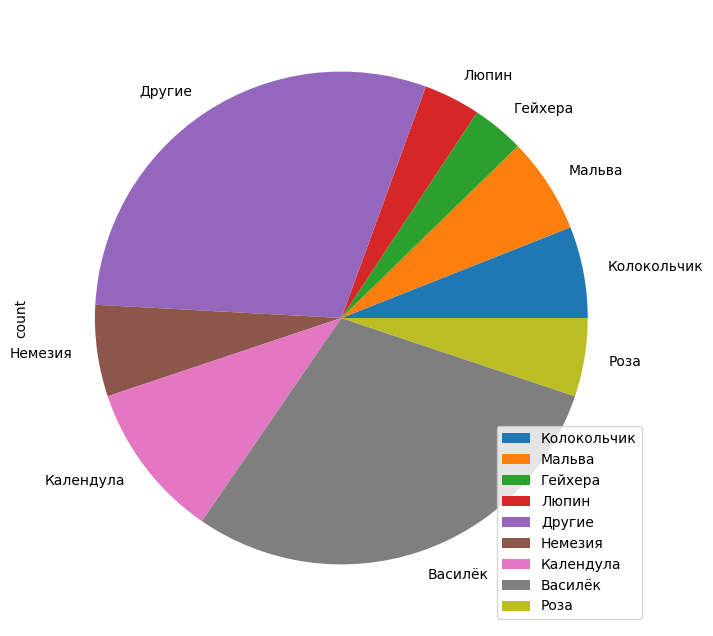

In [85]:
#строим круговую диаграмму, чтобы визуализировать относительную величину сетей с точки зрения количества заправочных станций
stat_grouped.plot(kind='pie', y='count', figsize=(8,8))

Получили финальный список наиболее интересных АЗС:
- «Роза». Самая медленная среди крупных сетей.
- «Василёк». Вторая по медлительности, но очень крупная по размеру сеть АЗС.
- «Календула». Близка по времени к «Васильку» и вторая по величине.
- «Немезия». Последняя из медленных и сравнительно крупных АЗС.

Напоследок посмотрите, как продолжительность заездов распределяется по девяти сетям («Большая восьмёрка» и «Другие»). Загвоздка может быть вот в чём: если продолжительность сильно различается, то сравнивать показатели разных сетей будет неправильно. Например, если в одной сети больше АЗС с продолжительностью заездов по 60–70 секунд, чем в других, это может понижать медианное значение. 

In [86]:
good_data['group_name'] = (
    good_data['name'] \
    .where(good_data['name'].isin(big_nets_stat.index), 'Другие')
)
good_data.head(5)

,date_time,id,time_spent,name,local_time,date_hour,too_fast,too_slow,group_name
0,2018-04-06 16:53:58,76144fb2,98.0,Василёк,2018-04-06 19:53:58,2018-04-06 20:00:00,False,False,Василёк
2,2018-04-03 17:28:24,76144fb2,220.0,Василёк,2018-04-03 20:28:24,2018-04-03 20:00:00,False,False,Василёк
6,2018-04-02 08:23:21,76144fb2,555.0,Василёк,2018-04-02 11:23:21,2018-04-02 11:00:00,False,False,Василёк
7,2018-04-07 00:34:08,76144fb2,286.0,Василёк,2018-04-07 03:34:08,2018-04-07 04:00:00,False,False,Василёк
9,2018-04-05 13:19:39,76144fb2,248.0,Василёк,2018-04-05 16:19:39,2018-04-05 16:00:00,False,False,Василёк


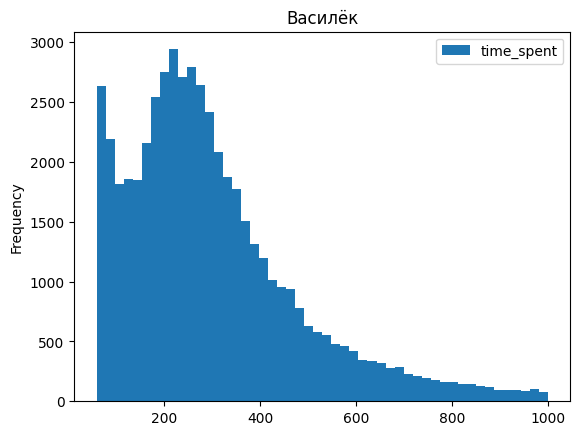

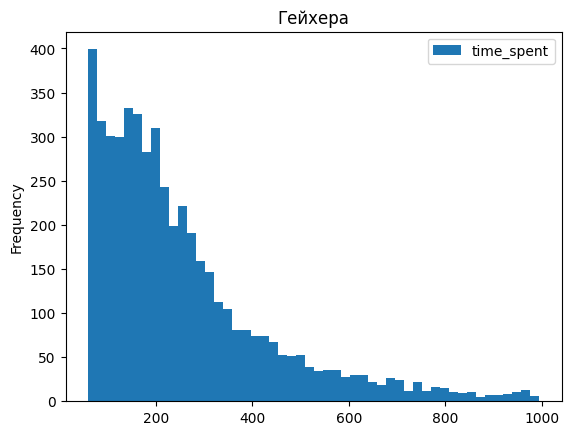

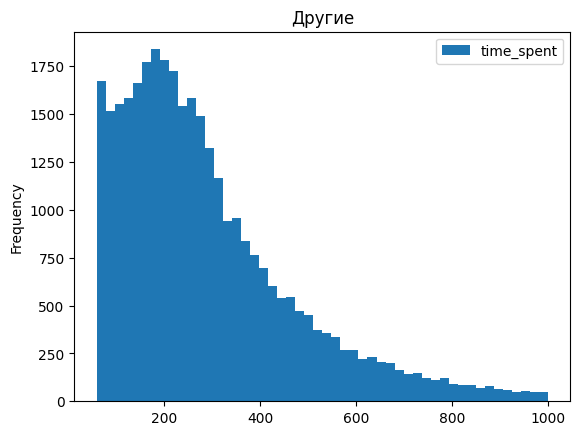

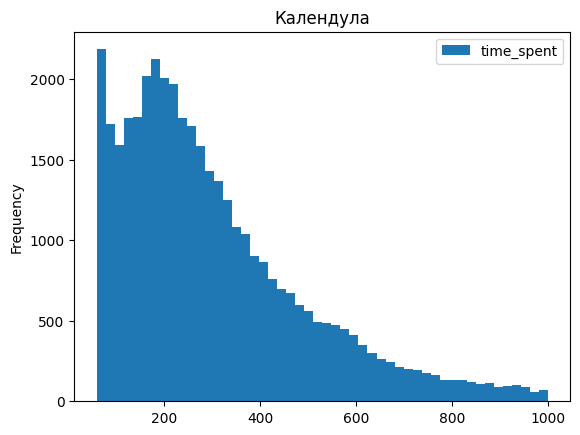

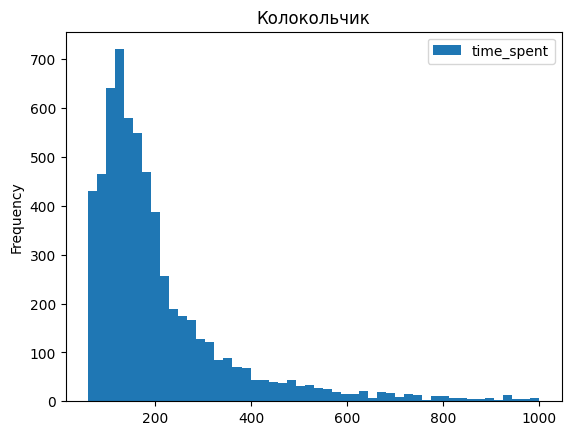

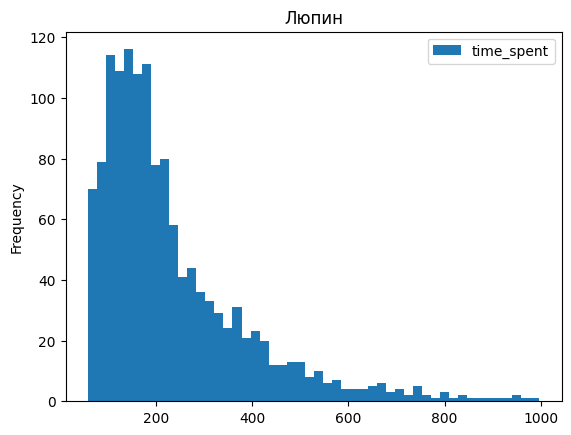

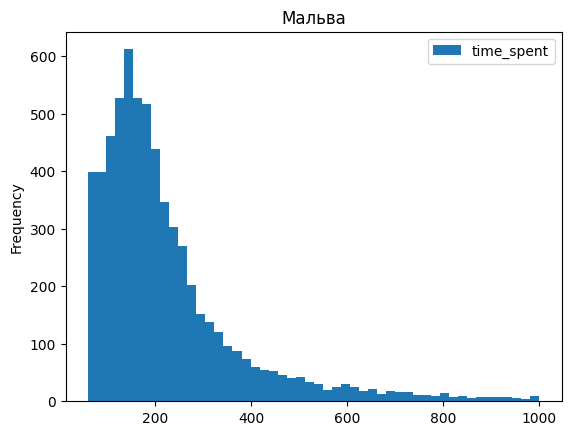

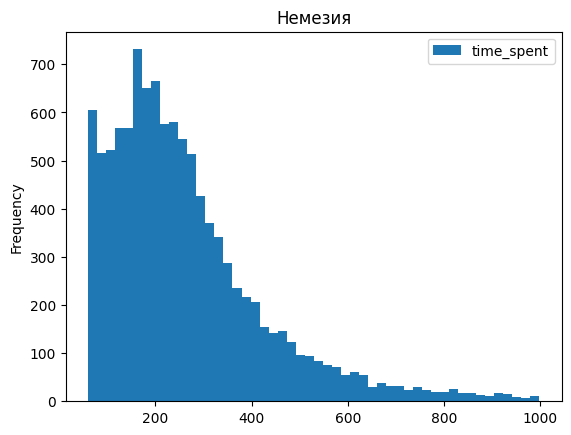

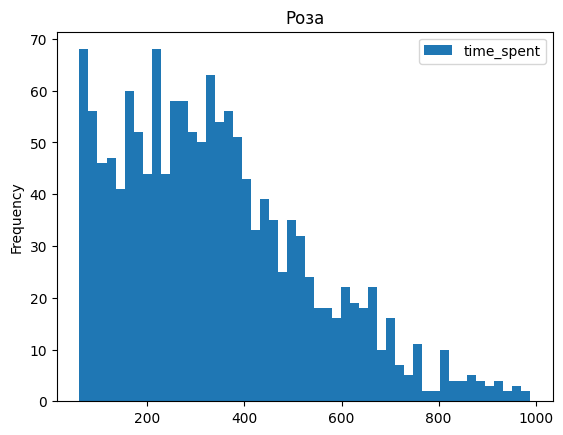

In [88]:
#строим гистограмму, чтобы увидеть, как распределяется продолжительность заездов в каждой сети
for name, group_data in good_data.groupby('group_name'):
    group_data.plot(kind='hist', bins=50, y='time_spent', title=name)

Распределение времени заправок по сетям выглядит логичным и более-менее одинаковым: больших скачков из-за коротких заездов не наблюдается. 